<a href="https://colab.research.google.com/github/rcpaffenroth/dac_raghu/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

import json

In [13]:
name = 'circle'
#name = 'MNIST'
# Read the json info file
with open(f'4-data/info.json') as f:
    info = json.load(f)
# Read the start data
x_start = pd.read_parquet(f'4-data/{name}_start.parquet')
# Read the target data
x_target = pd.read_parquet(f'4-data/{name}_target.parquet')


# Dynamical system

In [14]:
x_size = x_start.shape[1]

# # A pytorch module that multiplies the output of two other modules, where the two modules are given as arguments to the constructor, and the fo
# # The forward method takes a single argument and returns a single tensor.
# class Multiply(nn.Module):
#     def __init__(self, module1, module2):
#         super().__init__()
#         self.module1 = module1
#         self.module2 = module2
#     def forward(self, x):
#         return self.module1(x) * self.module2(x)

# map = Multiply(nn.Linear(x_size, x_size), nn.Linear(x_size, x_size)) 

map = nn.Sequential(nn.Linear(x_size, 100), nn.ReLU(), nn.Linear(100, x_size))

In [15]:
# Turn a pandas dataframe into a pytorch tensor
def df_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Make two pytorch tensor datasets from the start and target data
x_start_tensor = df_to_tensor(x_start)
x_target_tensor = df_to_tensor(x_target)

# a dataloader which returns a batch of start and target data
class Data(torch.utils.data.Dataset):
    def __init__(self, x_start, x_target):
        self.x_start = x_start
        self.x_target = x_target
    def __len__(self):
        return len(self.x_start)
    def __getitem__(self, idx):
        return self.x_start[idx], self.x_target[idx]
    
train_data = Data(x_start_tensor, x_target_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)

In [16]:
# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(map.parameters(), lr=0.001)

In [17]:
max_epochs = 200
# Train the model
for epoch in range(max_epochs):
    for batch_idx, (start, target) in enumerate(train_loader):
        optimizer.zero_grad()
        mapped = map(start)
        loss = criterion(mapped, target)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Batch {batch_idx}, Loss {loss.item()}')

Epoch 0, Batch 9, Loss 0.3870100677013397
Epoch 10, Batch 9, Loss 0.0063780928030610085
Epoch 20, Batch 9, Loss 0.004852671176195145


Epoch 30, Batch 9, Loss 0.004073049407452345
Epoch 40, Batch 9, Loss 0.003674156730994582
Epoch 50, Batch 9, Loss 0.0034547466784715652
Epoch 60, Batch 9, Loss 0.002562334295362234
Epoch 70, Batch 9, Loss 0.0022811300586909056
Epoch 80, Batch 9, Loss 0.002228835830464959
Epoch 90, Batch 9, Loss 0.002410494489595294
Epoch 100, Batch 9, Loss 0.002289256313815713
Epoch 110, Batch 9, Loss 0.0012300789821892977
Epoch 120, Batch 9, Loss 0.0011459680972620845
Epoch 130, Batch 9, Loss 0.0012469319626688957
Epoch 140, Batch 9, Loss 0.0008551329956389964
Epoch 150, Batch 9, Loss 0.00048341864021494985
Epoch 160, Batch 9, Loss 0.0005013351910747588
Epoch 170, Batch 9, Loss 0.00035656325053423643
Epoch 180, Batch 9, Loss 0.00048447720473632216
Epoch 190, Batch 9, Loss 0.0003512528201099485


# Training data

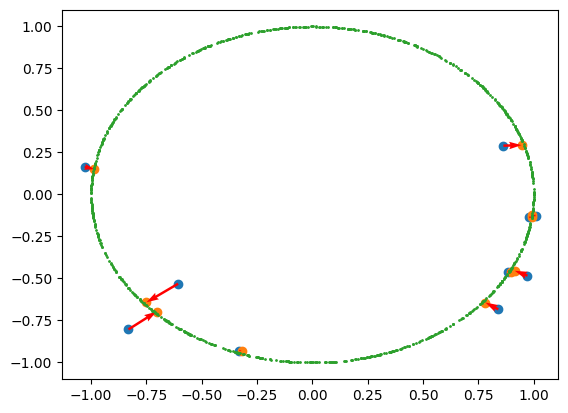

In [18]:
mapped_tensor = map(x_start_tensor).detach()
plot_points = 10

plt.figure()

plt.scatter(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1])
plt.scatter(mapped_tensor[:plot_points,0], mapped_tensor[:plot_points,1])
dx = mapped_tensor[:plot_points,0]-x_start_tensor[:plot_points,0]
dy = mapped_tensor[:plot_points,1]-x_start_tensor[:plot_points,1]
plt.quiver(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1], dx, dy, scale=1, scale_units='xy', angles='xy', color='r', width=0.005)

plt.scatter(x_target_tensor[:,0], x_target_tensor[:,1], s=1)
plt.show()

# Testing data

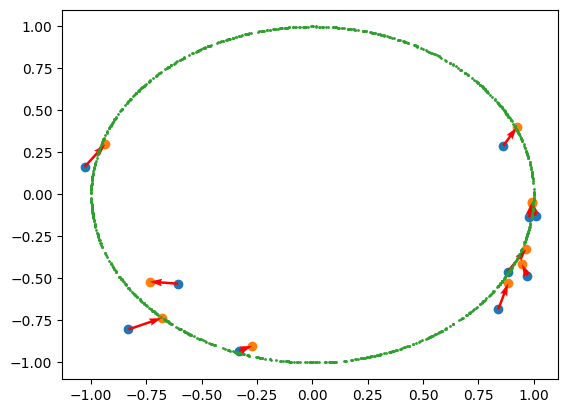

In [19]:
mapped_tensor = map(x_start_tensor+torch.rand_like(x_start_tensor)*0.2).detach()
plot_points = 10

plt.figure()

plt.scatter(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1])
plt.scatter(mapped_tensor[:plot_points,0], mapped_tensor[:plot_points,1])
dx = mapped_tensor[:plot_points,0]-x_start_tensor[:plot_points,0]
dy = mapped_tensor[:plot_points,1]-x_start_tensor[:plot_points,1]
plt.quiver(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1], dx, dy, scale=1, scale_units='xy', angles='xy', color='r', width=0.005)

plt.scatter(x_target_tensor[:,0], x_target_tensor[:,1], s=1)
plt.show()

# Iterated model

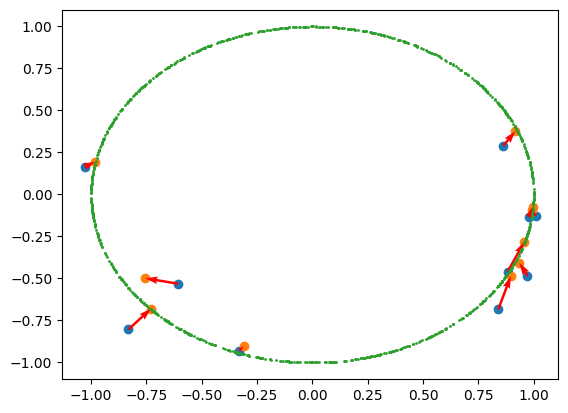

In [20]:
mapped_tensor = map(x_start_tensor+torch.rand_like(x_start_tensor)*0.2).detach()
plot_points = 10

plt.figure()

plt.scatter(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1])
plt.scatter(mapped_tensor[:plot_points,0], mapped_tensor[:plot_points,1])
dx = mapped_tensor[:plot_points,0]-x_start_tensor[:plot_points,0]
dy = mapped_tensor[:plot_points,1]-x_start_tensor[:plot_points,1]
plt.quiver(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1], dx, dy, scale=1, scale_units='xy', angles='xy', color='r', width=0.005)

plt.scatter(x_target_tensor[:,0], x_target_tensor[:,1], s=1)
plt.show()

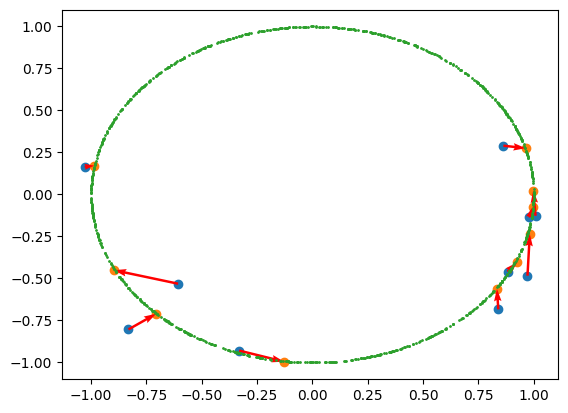

In [21]:
mapped_tensor = map(map(map(map(map(x_start_tensor+torch.rand_like(x_start_tensor)*0.2))))).detach()
plot_points = 10

plt.figure()

plt.scatter(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1])
plt.scatter(mapped_tensor[:plot_points,0], mapped_tensor[:plot_points,1])
dx = mapped_tensor[:plot_points,0]-x_start_tensor[:plot_points,0]
dy = mapped_tensor[:plot_points,1]-x_start_tensor[:plot_points,1]
plt.quiver(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1], dx, dy, scale=1, scale_units='xy', angles='xy', color='r', width=0.005)

plt.scatter(x_target_tensor[:,0], x_target_tensor[:,1], s=1)
plt.show()

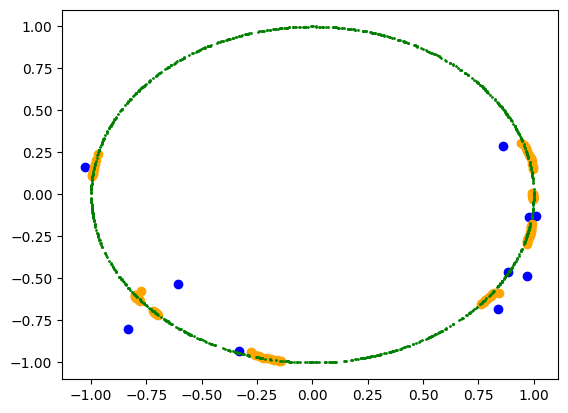

In [22]:
plot_points = 10

plt.figure()

plt.scatter(x_start_tensor[:plot_points,0], x_start_tensor[:plot_points,1], c='blue')

mapped_tensor = map(x_start_tensor+torch.rand_like(x_start_tensor)*0.2)

for i in range(10):
    plt.scatter(mapped_tensor[:plot_points,0].detach(), mapped_tensor[:plot_points,1].detach(), c='orange')
    mapped_tensor = map(mapped_tensor)

plt.scatter(x_target_tensor[:,0], x_target_tensor[:,1], s=1, c='green')
plt.show()